In [1]:
# Rede treinada no MNIST_FASHION treinada em umSel Organizing Map

In [1]:
###Bibliotecas da CNN

#Importa o Dataset do MNIST FASHION
from keras.datasets import fashion_mnist
#Importa o tipo de modelo Sequencial --> Camadas de neuronios em sequencia 
from keras.models import Sequential
#Camadas usadas na parte de MPL da rede
from keras.layers import Dense, Flatten, Dropout, Activation
#Camadas usadas na parte convolutiva da rede
from keras.layers import Conv2D, MaxPooling2D
#Função para transformar os labels em um vetor e plotar uma imagem do modelo criado
from keras.utils import to_categorical
#Modulo com os Optimizers da rede
import keras.optimizers
#Funções de custo
from keras import losses
#Pegar um valor inteiro aleatório
from random import randint
#Função para pegar o indice do valor máximo de um vetor
from numpy import argmax
#Para plotar as figuras
import matplotlib.pyplot as plt
#Para fazer o Data Augmanetation
from keras.preprocessing.image import ImageDataGenerator
#Funções gerais de um modelo
from keras import models
#Carrrega uma rede ja treinada
from keras.models import load_model
###Bibliotecas da SOM

#Self Organizing Map
from minisom import MiniSom

import matplotlib.pyplot as plt
import numpy as np
import pickle
import random

Using TensorFlow backend.
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
##CRIAÇÂO E TREINAMENTO DA REDE

##DEFINIÇÃO DOS PARAMETROS DA REDE

#Parametros do treinamento da rede
batch_size = 100
epochs = 5
num_classes = 10

##CRIAÇÃO DAS VARIÁVEIS COM OS DATASETS DA REDE

#Salva nas variaveis os datasets de treino e teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("X TREINO: ", x_train.shape)
print("X TESTE: ", x_test.shape)

#Define os nomes das classes (apenas para vizualização)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##TRATAMENTO DAS ENTRADAS PARA SE ADEQUAREM A REDE

#Transforma os labels em um vetor com as classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#Transforma as entradas em floats par que os calculos possam ser realizados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Regulariza as entradas para valores entre 0 e 1
x_train/=255
x_test/=255
#Redimensiona os Datasets para terem 4 dimensões necessárias para o Conv2D
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("X TREINO: ", x_train.shape)
print("X TESTE: ", x_test.shape)

##CRIAÇÃO DA REDE
model = load_model('/home/gustavo/JUPITER-LAB/networks/CNN_77_FashionMNIST.h5')

'''
#Modelo sequencial
model = Sequential()
#Primeira camada convolutiva com 34 filtros 3x3 e input_shape de 28x28x1
model.add(Conv2D(40, (6, 6), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
#Segunda camda convolutiva
model.add(Conv2D(60, (4, 4)))
model.add(Activation('sigmoid'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout de 25%
model.add(Dropout(0.2))
#STerceira camda convolutiva
model.add(Conv2D(60, (4, 4)))
model.add(Activation('relu'))
#Max Pooling de 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

#Parte MPL da rede
model.add(Flatten())

model.add(Dense(625))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(289))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(25))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(num_classes))
model.add(Activation('softmax'))
'''
model.summary()

'''
##COMPILAÇÃO E TREINAMENTO DA REDE

#Define a função de otimização
optimizer = keras.optimizers.Adam(lr=0.001)
#Compila o modelo definindo a função de custo e o otimizador
model.compile(loss=losses.mean_squared_logarithmic_error, optimizer=optimizer, metrics=['accuracy'])
#Treina a rede com os datasets
##model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
#Cria uma geredor de data que modifica os dados para melhorar o aprendizado
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=1, fill_mode='nearest', horizontal_flip=True, vertical_flip=True)
#Modifica os dados de treino de acordo com as especificações do gerador
datagen.fit(x_train)
#Treina o modelo com os dados modificados
model.fit_generator(datagen.flow(x_train, y_train, batch_size), epochs=epochs, validation_data=(x_test, y_test), shuffle=True, steps_per_epoch=len(x_train)/batch_size, workers=1)

model.save('CNN_77.h5')
'''

##AVALIANDO A REDE COM O DATASET DE TESTE
#score = model.evaluate(x_test, y_test, verbose=1)
#print("Test score: ", score[0])
#print("Test accuracy: ", score[1])

X TREINO:  (60000, 28, 28)
X TESTE:  (10000, 28, 28)
X TREINO:  (60000, 28, 28, 1)
X TESTE:  (10000, 28, 28, 1)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 40)        1480      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 60)        38460     
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 60)        0         
___________________________________________________________

"\n##COMPILAÇÃO E TREINAMENTO DA REDE\n\n#Define a função de otimização\noptimizer = keras.optimizers.Adam(lr=0.001)\n#Compila o modelo definindo a função de custo e o otimizador\nmodel.compile(loss=losses.mean_squared_logarithmic_error, optimizer=optimizer, metrics=['accuracy'])\n#Treina a rede com os datasets\n##model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)\n#Cria uma geredor de data que modifica os dados para melhorar o aprendizado\ndatagen = ImageDataGenerator(rotation_range=20, width_shift_range=1, fill_mode='nearest', horizontal_flip=True, vertical_flip=True)\n#Modifica os dados de treino de acordo com as especificações do gerador\ndatagen.fit(x_train)\n#Treina o modelo com os dados modificados\nmodel.fit_generator(datagen.flow(x_train, y_train, batch_size), epochs=epochs, validation_data=(x_test, y_test), shuffle=True, steps_per_epoch=len(x_train)/batch_size, workers=1)\n\nmodel.save('CNN_77.h5')\n"

In [3]:
###FUNCOES E OPERACOES REFERENTES AO TRATAMENTO DOS DADOS ANTES DO SOM

#Imprime os nomes das camadas do modelo
j = 0
for i in model.layers:
    print(j, ' - ', i.name)
    j += 1

data = np.concatenate((x_train, x_test))
labels = np.concatenate((y_train, y_test))
data.shape

0  -  conv2d_1
1  -  activation_1
2  -  conv2d_2
3  -  activation_2
4  -  max_pooling2d_1
5  -  dropout_1
6  -  conv2d_3
7  -  activation_3
8  -  max_pooling2d_2
9  -  flatten_1
10  -  dense_1
11  -  activation_4
12  -  dropout_2
13  -  dense_2
14  -  activation_5
15  -  dropout_3
16  -  dense_3
17  -  activation_6
18  -  dropout_4
19  -  dense_4
20  -  activation_7


(70000, 28, 28, 1)

In [4]:
'''
import pickle
#Nome: som_'dimensao do mapa'_'numero de exemplos treinados'_'camada da qual veio a entrada'.p
# saving the som in the file som.p
with open('som_30_10k_8.p', 'wb') as outfile:
    pickle.dump(som, outfile)
    
'''

"\nimport pickle\n#Nome: som_'dimensao do mapa'_'numero de exemplos treinados'_'camada da qual veio a entrada'.p\n# saving the som in the file som.p\nwith open('som_30_10k_8.p', 'wb') as outfile:\n    pickle.dump(som, outfile)\n    \n"

In [5]:
#Função que retorna o feature vector de uma determinada camada, dada uma imagem
def get_layer(model, image, layer_num):
    out = []
    layer_outputs = model.layers[layer_num].output
    # Extracts the outputs of the top 12 layers

    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
    # Creates a model that will return these outputs, given the model input

    layer = activation_model.predict(image)
    layer = layer[0]
    layer = layer.reshape(np.prod(layer.shape))
    out.append(layer)
    return out

class SymbolicLayer:
    
    def __init__(self, layer_input_size, soms_num, soms_sizes, output_size, learning_rate = 0.05, sigma = 3):
        self.layer_input_size = layer_input_size
        self.output_size = output_size
        self. soms_num = soms_num
        self.soms_sizes = soms_sizes
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.last_layer_input_size = sum(np.prod(som_shape) for som_shape in self.soms_sizes)
        self.layer_branches = []
        if (self.layer_input_size%self.soms_num == 0):
            self.soms_input_size = self.layer_input_size/self.soms_num
            for i in range(self.soms_num):
                self.layer_branches.append(MiniSom(int(self.soms_sizes[i][0]), int(self.soms_sizes[i][1]), int(self.soms_input_size), self.sigma, self.learning_rate))        
        self.out_layer = MiniSom(int(self.output_size[0]), int(self.output_size[1]), self.last_layer_input_size, self.sigma, self.learning_rate)
        
        
    def layerTrain(self, train_feature_maps):
        for j in range(len(train_feature_maps)):
            layer_input = []
            for i in range(self.soms_num):
                feature_map = train_feature_maps[j][0][int(i*self.soms_input_size):int((i+1)*self.soms_input_size)]
                #print(i, ' ', j, ' ', np.shape(feature_map))
                feature_map = feature_map.reshape((1, int(self.soms_input_size)))
                self.layer_branches[i].train(feature_map, 1)
                layer_input.append(np.reshape( self.layer_branches[i].activate(feature_map), (int(self.soms_sizes[i][0])*int(self.soms_sizes[i][1]))))
            layer_input = np.concatenate(layer_input)
            layer_input = np.reshape(layer_input, (1, self.last_layer_input_size))
            self.out_layer.train(layer_input, 1)
            
    def get_feature_maps(self, model, input_images, layer, verbose=True):
        #Passa os n primeiros elementos do dataset pela rede, pega o feature_vector de uma camada layer
        training_data = []
        cont = 0
        for image in input_images:
            image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
            image = get_layer(model, image, layer)
            image = np.reshape(image, (1, self.layer_input_size))
            training_data.append(image)
            if(verbose):
                if(cont%500 == 0):
                    print('Completo: ', cont)
                cont+=1
        return training_data
    
    def get_prediction_maps(self, feature_map):
        layer_input = []
        for i in range(self.soms_num):
            partial_feature_map = feature_map[0][0][int(i*self.soms_input_size):int((i+1)*self.soms_input_size)]
            #print(i, ' ', j, ' ', np.shape(feature_map))
            partial_feature_map = partial_feature_map.reshape((1, int(self.soms_input_size)))
            layer_input.append(np.reshape( self.layer_branches[i].activate(partial_feature_map), (int(self.soms_sizes[i][0])*int(self.soms_sizes[i][1]))))
        layer_input = np.concatenate(layer_input)
        layer_input = np.reshape(layer_input, (1, self.last_layer_input_size))
        return self.out_layer.activate(layer_input)
            

In [6]:
simb_layer = SymbolicLayer(8640, 4, ((15, 15), (10, 10), (10, 10), (15, 15)), (20, 20))

In [7]:
simb_layer.layerTrain(simb_layer.get_feature_maps(model, data[:5000], 4))

Completo:  0
Completo:  500
Completo:  1000
Completo:  1500
Completo:  2000
Completo:  2500
Completo:  3000
Completo:  3500
Completo:  4000
Completo:  4500


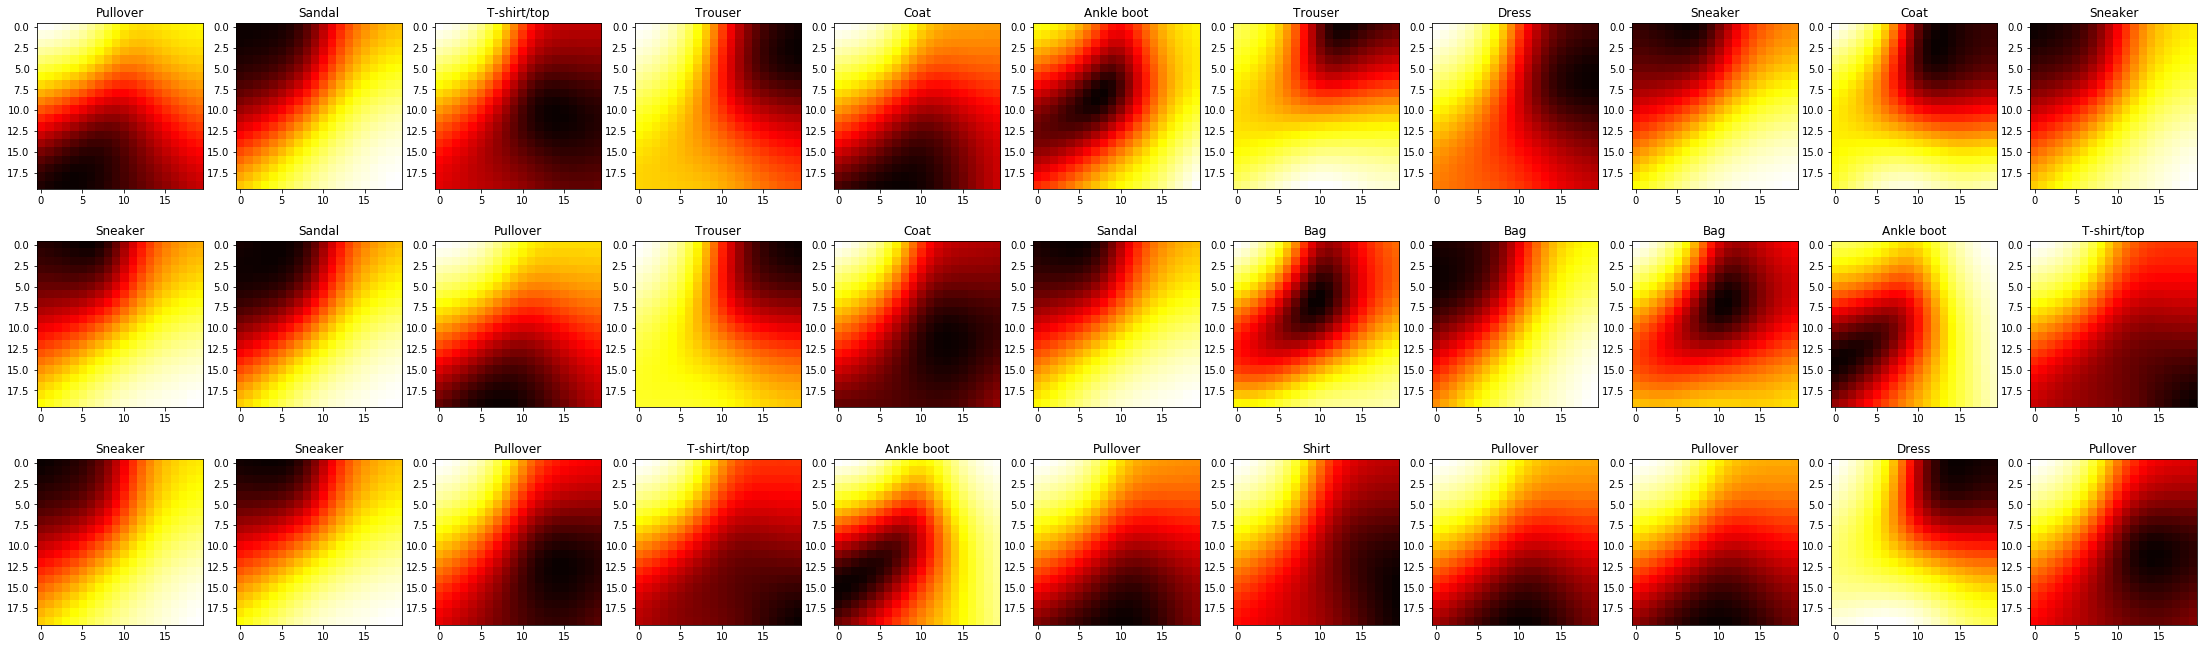

In [9]:
import random
j=1
for i in range(33):
    n = random.randint(50000, 60000)
    test_data = simb_layer.get_feature_maps(model, [data[n]], 4, verbose=False)
    out = simb_layer.get_prediction_maps(test_data)
    plt.subplot(len(out), 11, j)
    plt.imshow(out, cmap='hot')
    label = class_names[argmax(labels[n])]
    j+=1
    plt.title(label)
plt.subplots_adjust(left=0, bottom=0, right=5, top=15, wspace=0.2, hspace=0.2)
plt.show()
    

numpy.ndarray